# I] Import, options

In [1]:
import numpy, seaborn, pandas
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# II] Data Download

In [4]:
#data hNPC all H3K36me3
df_H3K36me3 = pandas.read_csv(file_directory+'1) input/hNPC_H3K36me3_allPeaks_max20_MACS3.csv',
                               sep = ',')

# select columns
columns = ['SYMBOL','Fold','p.value','annotation']
print(df_H3K36me3.shape)
df_H3K36me3[columns].head(5)

(17794, 25)


,SYMBOL,Fold,p.value,annotation
0,CREBL2,-20.405148,1.764480e-20,Promoter (1-2kb)
1,PCCA,-19.528880,2.116609e-18,"Intron (ENST00000376279.7/5095, intron 19 of 22)"
2,ZNF83,-19.227747,1.512751e-16,"Intron (ENST00000702778.1/ENST00000702778.1, i..."
3,EMBP1,-18.824480,9.374397e-16,Distal Intergenic
4,NRP1,-18.894174,1.186074e-15,5' UTR


In [5]:
#p.value is probably not adj.p.value

# III] VolcanoPlot

In [6]:
-numpy.log10(df_H3K36me3['p.value']).max()

2.0441449012763475

In [7]:
#define the colors
colors = ['blue' if x < -10.2 and -numpy.log10(y) > 7
          else 'red' if x > 1 and -numpy.log10(y) > 7
          else 'black' if x > -1 and x < 1
          else 'grey' for x, y in zip(df_H3K36me3['Fold'], df_H3K36me3['p.value'])]

blue_indices = [symbol for symbol, color in zip(df_H3K36me3['SYMBOL'], colors) if color == 'blue']
red_indices = [symbol for symbol, color in zip(df_H3K36me3['SYMBOL'], colors) if color == 'red']
grey_indices = [symbol for symbol, color in zip(df_H3K36me3['SYMBOL'], colors) if color == 'grey']

blue_genes_n = len(set(blue_indices))
red_genes_n = len(set(red_indices))
grey_genes_n = len(set(grey_indices))

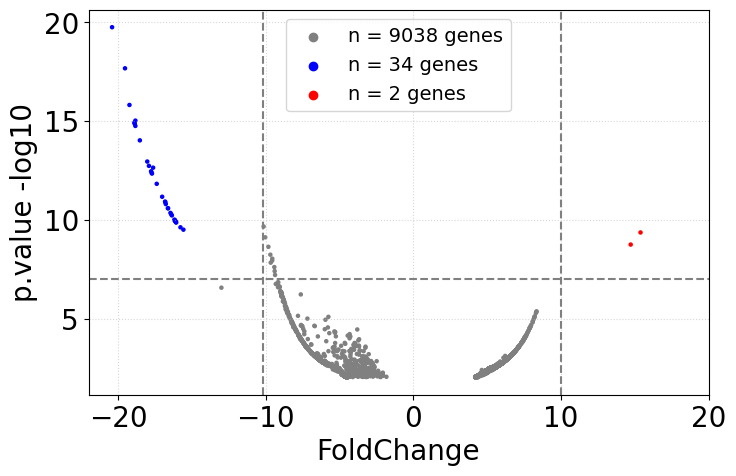

In [8]:
#volcano plot
# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df_H3K36me3['Fold'],y=df_H3K36me3['p.value'].apply(lambda x:-numpy.log10(x)),s=5,  c=colors)

plt.scatter(x=[],y=[], marker="o", color='grey', label= f'n = {grey_genes_n} genes')
plt.scatter(x=[],y=[], marker="o", color='blue', label= f'n = {blue_genes_n} genes')
plt.scatter(x=[],y=[], marker="o", color='red', label= f'n = {red_genes_n} genes')

plt.legend(fontsize = '14')
plt.xlim(-22, 20)
plt.xlabel("FoldChange")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_NPC_H3K36me3_MACS3_more_strict'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

## IV] Heatmap

In [9]:
df_H3K36me3.shape

(17794, 25)

In [10]:
#select the interesting genes
df_hm = df_H3K36me3[ (df_H3K36me3['Fold'] > 10) | (df_H3K36me3['Fold'] < -10.2) ]
df_hm = df_hm[ (df_hm['p.value'] < 10e-7) ]  # = 7 in -log10

print(df_hm.shape)

max_pval = df_hm['p.value'].max()
print(f'highest pvalue is {max_pval}')

df_hm = df_hm[['SYMBOL', 'Fold','p.value']]

# save this results
# df_hm.to_csv('{}/1) input/from_output/highest_NPC_H3K36me3_MACS3.csv'.format(file_directory), sep=',')
df_hm.head()

(37, 25)
highest pvalue is 2.66194856538175e-07


,SYMBOL,Fold,p.value
0,CREBL2,-20.405148,1.764480e-20
1,PCCA,-19.528880,2.116609e-18
2,ZNF83,-19.227747,1.512751e-16
3,EMBP1,-18.824480,9.374397e-16
4,NRP1,-18.894174,1.186074e-15


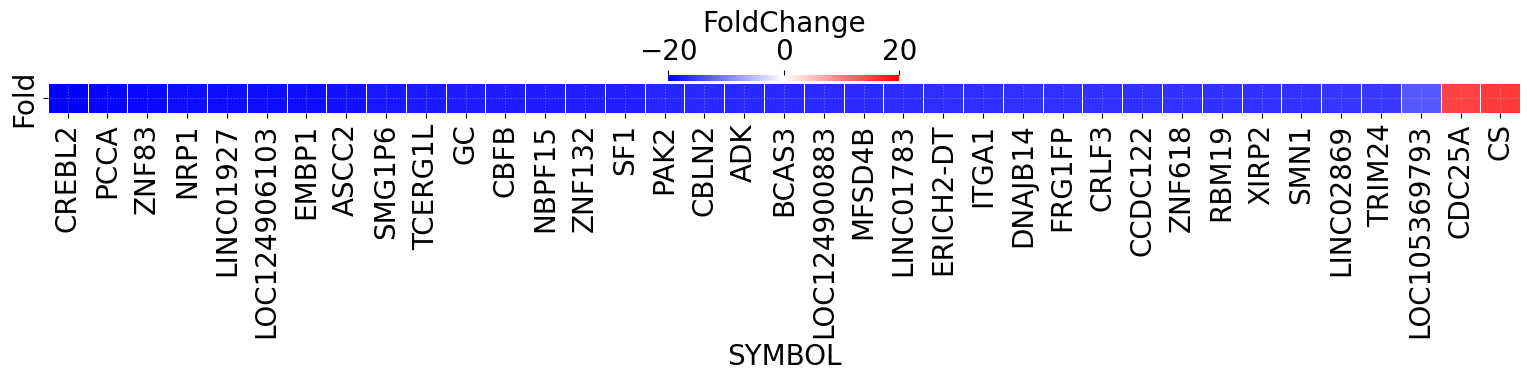

In [12]:
data = df_hm[['SYMBOL','Fold']]
data = data.sort_values(['Fold'], ascending = True)
data.set_index('SYMBOL', inplace= True)

plt.subplots(figsize=(19,0.5))
seaborn.heatmap(data.T, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-20, vmax=20,
               cbar_kws={'label': 'FoldChange', 'location' : 'top', 'orientation': 'horizontal',
                        'aspect': 40})

title_file = 'Heatmap_NPC_H3K36me3_MACS3_more_strict'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [29]:
# save the list to csv
df_hm.sort_values(['Fold'], ascending = True)
df_hm.to_csv('{}/1) input/from_output/hNPC_H3K36me3_topgenes.csv'.format(file_directory), 
             index= False, sep=',')

### Comparison results SEACR and MACS3

In [21]:
df_hm_macs3 = df_hm

In [19]:
%%time
#data mouse_NPC
df_seacr = pandas.read_csv(file_directory+'1) input/hNPC_H3K36me3_AllPeaks_SEACR.csv',
                               sep = ',')

#select the interesting genes

df_hm2 = df_seacr[ (df_seacr['Fold'] > 1) | (df_seacr['Fold'] < -1) ]
df_hm2 = df_hm2[ (df_hm2['p.value'] < 10e-6) ]

print(df_hm2.shape)

max_pval = df_hm2['p.value'].max()
print(f'highest pvalue is {max_pval}')

df_hm_seacr = df_hm2[['SYMBOL', 'Fold','p.value']]
df_hm_seacr.head()

(35, 23)
highest pvalue is 9.65779871320066e-06
CPU times: total: 156 ms
Wall time: 238 ms


,SYMBOL,Fold,p.value
0,SMG1P6,-17.182478,1.322149e-11
1,NBPF15,-16.860628,5.894429e-11
2,CENPE,-10.689641,1.304364e-10
3,NSMAF,-10.539568,2.025052e-10
4,YEATS2,-10.345687,7.394206e-10


In [20]:
# see what are the commun genes
merged_df = pandas.merge(df_hm_macs3, df_hm_seacr, on='SYMBOL', how='inner')
merged_df

,SYMBOL,Fold_x,p.value_x,Fold_y,p.value_y
0,SMG1P6,-18.021994,1.103658e-13,-17.182478,1.322149e-11
1,NBPF15,-17.702601,4.474387e-13,-16.860628,5.894429e-11
2,LINC01783,-16.450446,4.380936e-11,-16.117606,1.013423e-09


# V] Classification by annotation

In [34]:
#to see the different kind of annotation 
# set(df_H3K36me3.annotation)

In [12]:
# create a function to simplufy the annotation
def get_annotation_category(annotation):
    if annotation.startswith('Intron'):
        return 'Intron'
    elif annotation.startswith('Exon'):
        return 'Exon'
    elif annotation.startswith('Promoter'):
        return 'Promoter'
    else:
        return annotation

In [13]:
df_H3K36me3 = df_H3K36me3.assign(Annotation = df_H3K36me3['annotation'].apply(get_annotation_category))
df_H3K36me3 = df_H3K36me3[['SYMBOL', 'Fold', 'p.value', 'FDR', 'Annotation']]
print(set(df_H3K36me3.Annotation), '\n')

df_H3K36me3['Annotation'] = df_H3K36me3['Annotation'].str.strip()
df_H3K36me3

{"3' UTR", 'Promoter', "5' UTR", 'Distal Intergenic', 'Exon', 'Downstream (<=300bp)', 'Intron'} 



,SYMBOL,Fold,p.value,FDR,Annotation
0,CREBL2,-20.405148,1.764480e-20,1.738648e-15,Promoter
1,PCCA,-19.528880,2.116609e-18,1.042811e-13,Intron
2,ZNF83,-19.227747,1.512751e-16,4.968680e-12,Intron
3,EMBP1,-18.824480,9.374397e-16,2.245645e-11,Distal Intergenic
4,NRP1,-18.894174,1.186074e-15,2.245645e-11,5' UTR
...,...,...,...,...,...
17789,EYA1,4.209499,9.027092e-03,4.996032e-02,Intron
17790,IFFO2,4.218131,9.029145e-03,4.996326e-02,Distal Intergenic
17791,LOC728739,4.218131,9.029145e-03,4.996326e-02,Distal Intergenic
17792,LSAMP,4.218131,9.029145e-03,4.996326e-02,Intron


In [14]:
df_H3K36me3.Annotation.value_counts()

Annotation
Intron                  8536
Promoter                5233
Distal Intergenic       1789
Exon                    1081
3' UTR                  1068
5' UTR                    72
Downstream (<=300bp)      15
Name: count, dtype: int64

In [30]:
seaborn.scatterplot(data=df_H3K36me3, x=df_H3K36me3['Fold'], 
                    y=df_H3K36me3['p.value'].apply(lambda x:-numpy.log10(x)), 
                    s=20, edgecolor='none', hue="Annotation")

plt.legend(loc='upper right', bbox_to_anchor=(1.60, 1), fontsize='15')

plt.title('All genes, colors based on annotation')
plt.xlim(-22, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_hNPC_H3K36me3_all_annotation'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

ValueError: Could not interpret value `Annotation` for parameter `hue`

In [16]:
# Check up to see if its true (yes, the colors fit to the annotation)
df_ctl = df_H3K36me3[ (df_H3K36me3['Fold'] < 1) ]
df_ctl.sort_values('Fold')

,SYMBOL,Fold,p.value,FDR,Annotation
0,CREBL2,-20.405148,1.764480e-20,1.738648e-15,Promoter
1,PCCA,-19.528880,2.116609e-18,1.042811e-13,Intron
2,ZNF83,-19.227747,1.512751e-16,4.968680e-12,Intron
4,NRP1,-18.894174,1.186074e-15,2.245645e-11,5' UTR
5,LINC01927,-18.870846,1.367406e-15,2.245645e-11,Intron
...,...,...,...,...,...
16270,STAT1,-2.102012,5.771308e-03,3.493495e-02,Intron
15895,KPNB1,-2.065600,5.316754e-03,3.294709e-02,Promoter
16624,SNORD94,-2.059913,6.315468e-03,3.741325e-02,Intron
17268,PCBP2,-2.051993,7.704129e-03,4.393137e-02,Promoter
